### Plot the results from harp using the sqlite output

In [1]:
import pandas as pd
import sqlite3
from datetime import datetime
import os
import sys
from collections import OrderedDict
import numpy as np

In [3]:
DB="/home/cap/Downloads/test_snow_verif_harp.sqlite"
table="FSS"
con = sqlite3.connect(DB)
sql_com = f"SELECT * FROM {table}"
df = pd.read_sql(sql_com,con)
con.close()

In [5]:
df = df[df["threshold"] == 1.0]

In [6]:
df

,model,prm,fcdate,leadtime,threshold,scale,fss
217,cerise,bin_snow,1.430438e+09,0.0,1.0,0.0,0.724966
218,cerise,bin_snow,1.430438e+09,0.0,1.0,1.0,0.774529
219,cerise,bin_snow,1.430438e+09,0.0,1.0,2.0,0.787944
220,cerise,bin_snow,1.430438e+09,0.0,1.0,4.0,0.804243
221,cerise,bin_snow,1.430438e+09,0.0,1.0,8.0,0.826750
...,...,...,...,...,...,...,...
429,cerise,bin_snow,1.433030e+09,0.0,1.0,2.0,0.913366
430,cerise,bin_snow,1.433030e+09,0.0,1.0,4.0,0.924426
431,cerise,bin_snow,1.433030e+09,0.0,1.0,8.0,0.936737
432,cerise,bin_snow,1.433030e+09,0.0,1.0,12.0,0.944828


In [11]:
df["date"] = pd.to_datetime(df["fcdate"],unit="s")


/tmp/ipykernel_74573/256358451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["fcdate"],unit="s")


In [26]:
df["day"] = [datetime.strftime(d,"%Y-%m-%d") for d in df.date]

/tmp/ipykernel_74573/3454982881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["day"] = [datetime.strftime(d,"%Y-%m-%d") for d in df.date]


In [27]:
df.head(10)

,model,prm,fcdate,leadtime,threshold,scale,fss,date,day
217,cerise,bin_snow,1.430438e+09,0.0,1.0,0.0,0.724966,2015-05-01,2015-05-01
218,cerise,bin_snow,1.430438e+09,0.0,1.0,1.0,0.774529,2015-05-01,2015-05-01
219,cerise,bin_snow,1.430438e+09,0.0,1.0,2.0,0.787944,2015-05-01,2015-05-01
220,cerise,bin_snow,1.430438e+09,0.0,1.0,4.0,0.804243,2015-05-01,2015-05-01
221,cerise,bin_snow,1.430438e+09,0.0,1.0,8.0,0.826750,2015-05-01,2015-05-01
222,cerise,bin_snow,1.430438e+09,0.0,1.0,12.0,0.843613,2015-05-01,2015-05-01
223,cerise,bin_snow,1.430438e+09,0.0,1.0,20.0,0.866128,2015-05-01,2015-05-01
224,cerise,bin_snow,1.430525e+09,0.0,1.0,0.0,0.735934,2015-05-02,2015-05-02
225,cerise,bin_snow,1.430525e+09,0.0,1.0,1.0,0.786642,2015-05-02,2015-05-02
226,cerise,bin_snow,1.430525e+09,0.0,1.0,2.0,0.800198,2015-05-02,2015-05-02


In [28]:
pivot_df = df.pivot(index='day', columns='scale', values='fss')


In [29]:
pivot_df

scale,0.0,1.0,2.0,4.0,8.0,12.0,20.0
day,,,,,,,
2015-05-01,0.724966,0.774529,0.787944,0.804243,0.826750,0.843613,0.866128
2015-05-02,0.735934,0.786642,0.800198,0.816613,0.839313,0.856101,0.878200
2015-05-03,0.764027,0.808818,0.820139,0.832740,0.849357,0.861300,0.876974
2015-05-04,0.747540,0.791818,0.802777,0.814976,0.831002,0.842860,0.858457
2015-05-05,0.734448,0.775423,0.786004,0.797791,0.813077,0.824092,0.838290
2015-05-06,0.727158,0.768957,0.780242,0.793116,0.810106,0.822418,0.838171
2015-05-07,0.733628,0.778508,0.790419,0.803896,0.820785,0.832822,0.848776
2015-05-08,0.731524,0.779818,0.792308,0.806094,0.823211,0.835027,0.850814
2015-05-09,0.731493,0.775699,0.786897,0.799355,0.815337,0.826768,0.842477


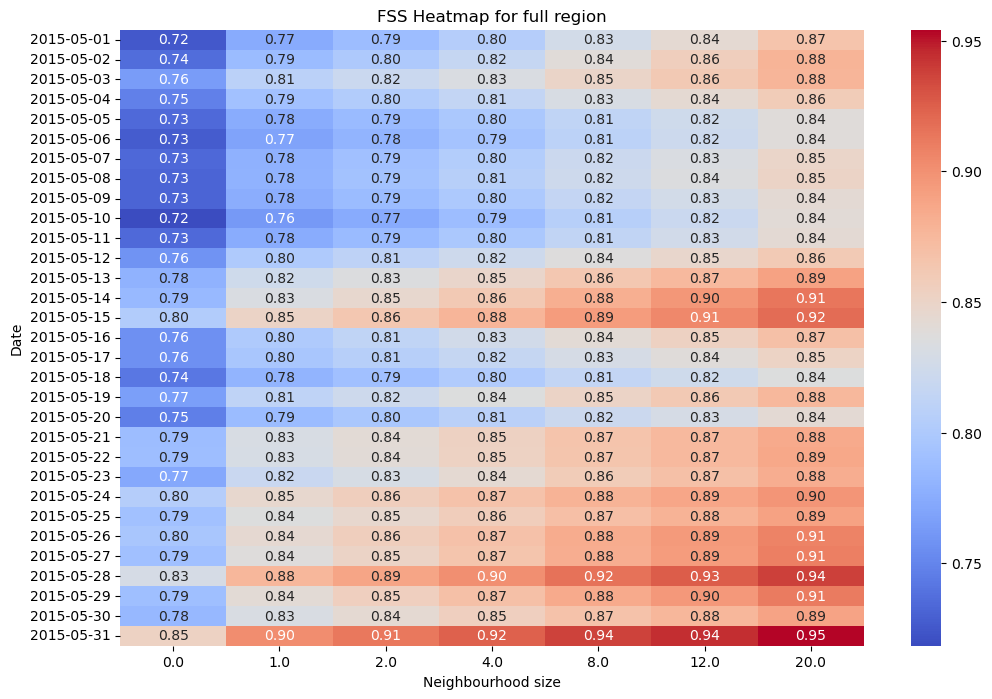

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
cmap = "viridis"
cmap = "coolwarm"
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap=cmap)

plt.title(f'FSS Heatmap for full region')
plt.xlabel('Neighbourhood size')
plt.ylabel('Date')

plt.show()